In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression 
%matplotlib inline 

In [2]:
df = pd.read_csv('rice_beef_coffee_price_changes.csv')

In [3]:
df

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46
...,...,...,...,...,...,...,...,...,...
355,2021,Sep,5.66,0.40,4.97,-1.29,0.39,5.59,4.91
356,2021,Oct,5.70,0.40,5.31,-1.29,0.39,5.63,5.24
357,2021,Nov,5.95,0.40,5.71,-1.29,0.39,5.87,5.64
358,2021,Dec,5.95,0.40,5.91,-1.29,0.39,5.87,5.83


In [4]:
df.describe()

,Year,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
count,360.000000,360.000000,360.000000,360.000000,347.000000,347.000000,347.000000,347.000000
mean,2006.583333,3.152056,0.364083,2.999722,36.320029,0.476167,4.044006,3.953660
std,8.671906,1.167673,0.131201,1.164001,27.062804,0.135525,0.900393,1.460999
min,1992.000000,1.630000,0.160000,1.170000,-1.290000,0.240000,2.680000,1.770000
25%,1999.000000,2.117500,0.260000,2.265000,12.370000,0.390000,3.185000,3.065000
50%,2007.000000,2.730000,0.345000,2.940000,28.300000,0.460000,4.090000,3.680000
75%,2014.000000,4.220000,0.440000,3.605000,59.700000,0.550000,4.735000,4.565000
max,2022.000000,6.170000,0.910000,6.620000,89.590000,1.120000,6.930000,9.760000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               360 non-null    int64  
 1   Month              360 non-null    object 
 2   Price_beef_kilo    360 non-null    float64
 3   Price_rice_kilo    360 non-null    float64
 4   Price_coffee_kilo  360 non-null    float64
 5   Inflation_rate     347 non-null    float64
 6   Price_rice_infl    347 non-null    float64
 7   Price_beef_infl    347 non-null    float64
 8   Price_coffee_infl  347 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.0+ KB


In [6]:
df.isna().sum()

Year                  0
Month                 0
Price_beef_kilo       0
Price_rice_kilo       0
Price_coffee_kilo     0
Inflation_rate       13
Price_rice_infl      13
Price_beef_infl      13
Price_coffee_infl    13
dtype: int64

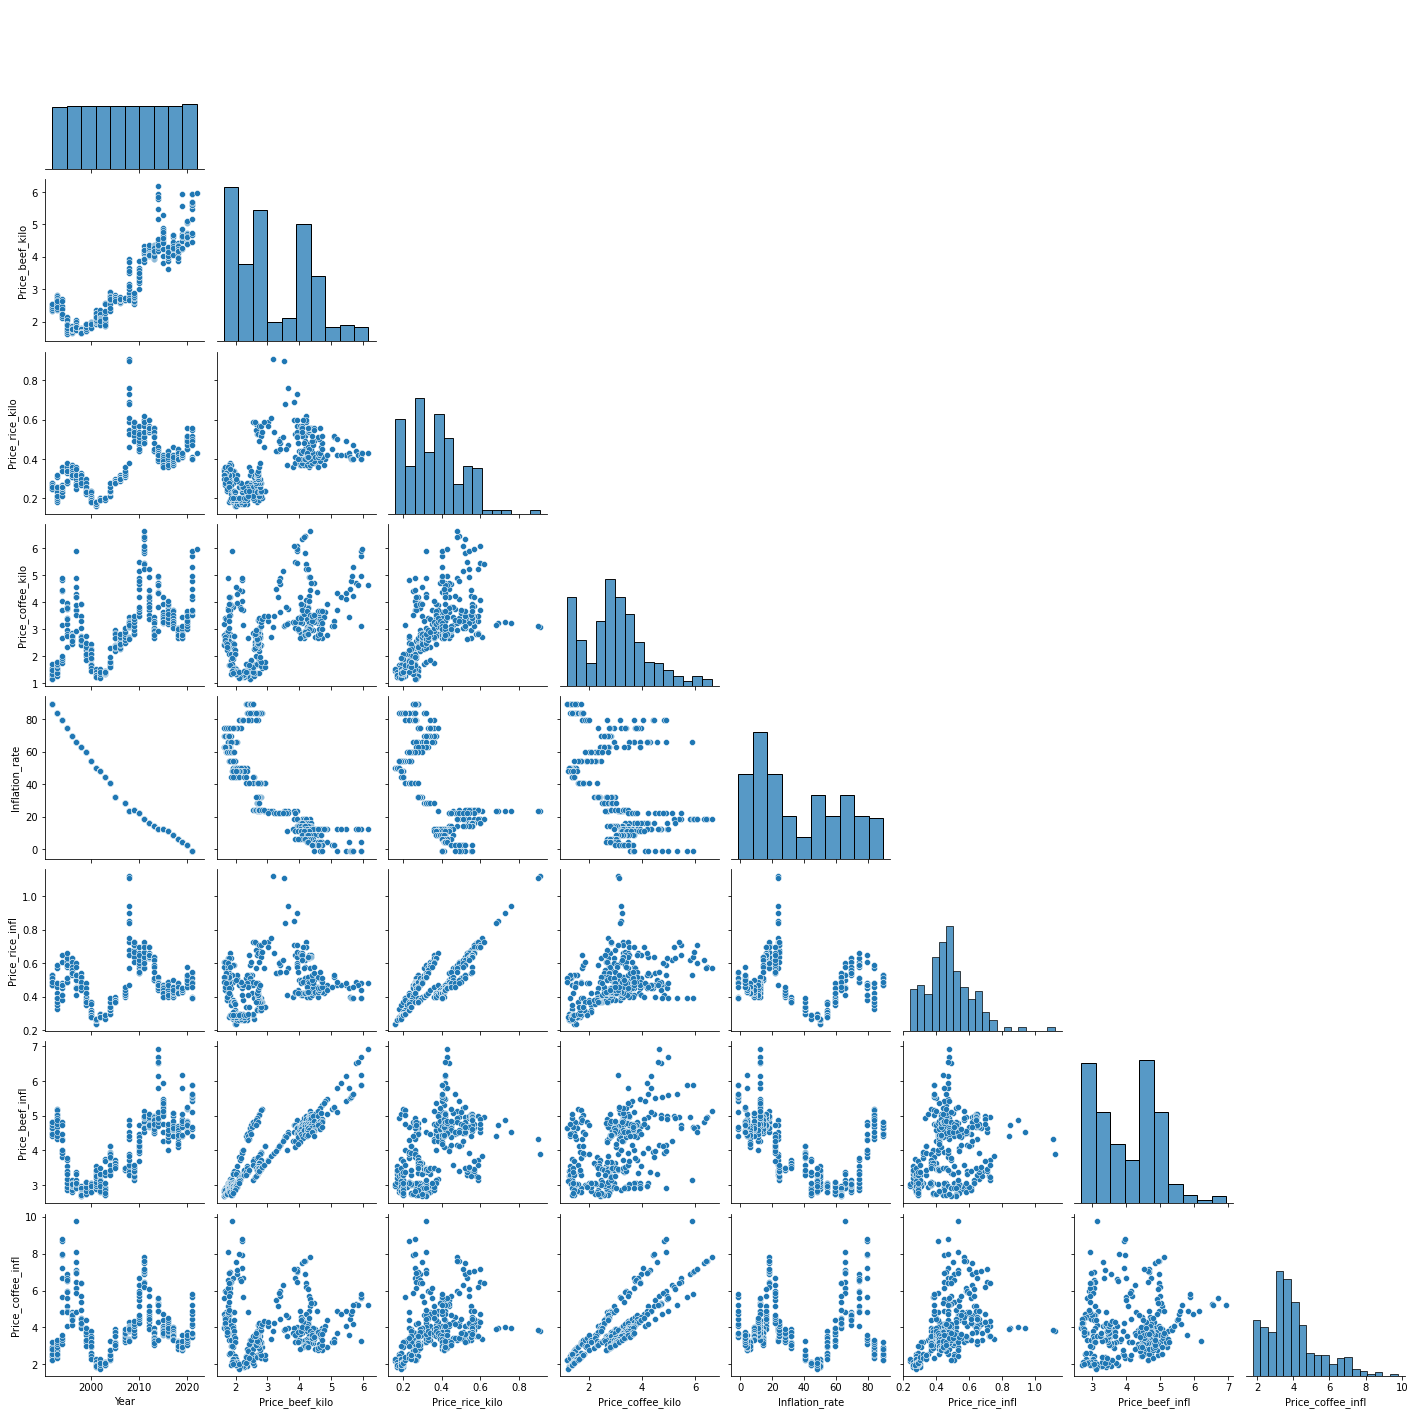

In [7]:
sb.pairplot(df, corner=True)

In [8]:
df.dropna(inplace=True)
df.isna().sum()

Year                 0
Month                0
Price_beef_kilo      0
Price_rice_kilo      0
Price_coffee_kilo    0
Inflation_rate       0
Price_rice_infl      0
Price_beef_infl      0
Price_coffee_infl    0
dtype: int64

### Fitting the data into the LinearRegression  model

In [9]:
X = df[['Price_beef_kilo','Price_rice_kilo','Price_coffee_kilo','Inflation_rate']]
y = df[['Price_beef_infl','Price_rice_infl','Price_coffee_infl']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train )

LinearRegression()

In [13]:
lr.score(X_test,y_test)

0.9765751754048169

In [14]:
lr.score(X_train,y_train)

0.9771272448645725

In [15]:
lr.coef_

array([[ 1.14440635,  0.44705926, -0.04668951,  0.02432326],
       [-0.01218831,  1.28143682,  0.00453613,  0.00292026],
       [-0.24458662, -0.10793385,  1.43263568,  0.02169381]])

In [16]:
lr.intercept_

array([-0.48033991, -0.07435445, -0.32565644])

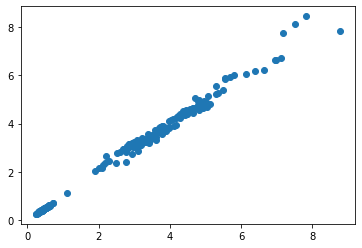

In [17]:
prediction = lr.predict(X_test)
plt.scatter(y_test, prediction)

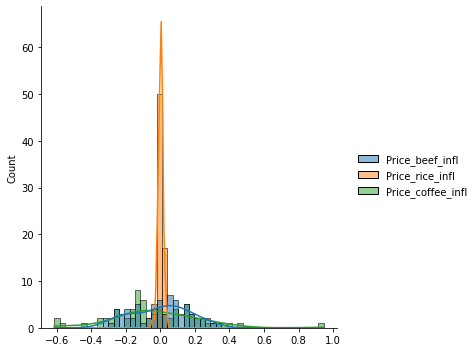

In [18]:
sb.displot((y_test-prediction), bins=50, kde=True)

In [19]:
new_preds = pd.DataFrame(prediction, columns=['Price_beef_infl','Price_rice_infl','Price_coffee_infl'])
new_preds

,Price_beef_infl,Price_rice_infl,Price_coffee_infl
0,3.339840,0.707724,4.191003
1,3.718564,0.493562,6.199419
2,4.824829,0.571342,8.443869
3,4.218407,0.411988,3.594778
4,3.086334,0.477421,6.184876
...,...,...,...
65,5.236988,0.445308,3.812704
66,3.272902,0.412047,3.840216
67,3.288801,0.461602,3.879448
68,6.054130,0.453111,4.779560


In [20]:
y_test

,Price_beef_infl,Price_rice_infl,Price_coffee_infl
208,3.40,0.71,4.09
35,3.72,0.49,6.65
230,5.12,0.57,7.83
288,4.28,0.42,3.61
71,2.97,0.47,6.40
...,...,...,...
277,5.30,0.46,3.97
188,3.43,0.42,3.80
191,3.42,0.47,3.81
274,6.14,0.47,4.88


In [21]:
#making predictions 
lr.predict([[23, 67, 24, 19.5]])

array([[55.14773182, 85.66739323, 21.62356937]])